In [87]:
import random
from names import get_full_name
from tqdm import tqdm
from scipy import stats

def expected_win_chance(elo_diff):
    return 100 / (1 + 10**(elo_diff/400))

def expected_draw_chance(elo_diff, elo_level):
    return -0.07067227*elo_diff + 0.01541295*elo_level + 9.57851891

class competition:
    
    def __init__(self, nr_players):
        skill_levels = stats.truncnorm((0 - 0.5) / 0.15, (1 - 0.5) / 0.15, loc=0.5, scale=0.15).rvs(1)[0]
        self.player_poule = [player(skill_level = ) for i in tqdm(range(nr_players))]
        
    def play_random_matches(self, nr_of_games):
        len_player_poule = len(self.player_poule)
        for game in tqdm(range(nr_of_games)):
            p1 = random.randint(1,len_player_poule)
            lower = int(-0.05*len_player_poule) if p1 + int(-0.05*len_player_poule) >= 0 else -p1
            upper = int(0.05*len_player_poule) if p1 + int(0.05*len_player_poule) <= len_player_poule else len_player_poule - p1
            p2 = p1 + random.randint(lower, upper)

            m = match(self.player_poule[p1-1], self.player_poule[p2-1])
            m.simulate_match()

            if game % int(0.01*nr_of_games) == 0:
                self.player_poule.sort(key=lambda x: x.rating, reverse=True)
        
    def show_standings(self):
        sorted_poule = sorted(self.player_poule, key=lambda x: x.rating, reverse=True)
        print("leaderboard standings")
        print("------------------------------------")
        for p in sorted_poule[0:30]:
            print("{} | {:4d} | {:.3f}".format(p.name.ljust(21), round(p.rating), p.skill_level))
        for p in sorted_poule[-31:-1]:
            print("{} | {:4d} | {:.3f}".format(p.name.ljust(21), round(p.rating), p.skill_level))
        print("------------------------------------\n")
    

class match:
    
    def __init__(self, player1, player2):
        self.p1 = player1
        self.p2 = player2
        
        self.es_p1 = 1 / (1 + 10**((player2.rating - player1.rating) / 400))
        self.es_p2 = 1 / (1 + 10**((player1.rating - player2.rating) / 400))
    
    def simulate_match(self):
        win_chances = self.calculate_odds(self.p1.skill_level, self.p2.skill_level)

        result_p1 = random.choices([1, 0.5, 0], weights = win_chances, k=1)[0]
        result_p2 = 1-result_p1
        
        self.p1.update_rating(self.es_p1, result_p1)
        self.p2.update_rating(self.es_p2, result_p2)

        self.p1.games_played += 1
        self.p2.games_played += 1

        self.p1.update_k_factor()
        self.p2.update_k_factor
        
        return result_p1

    def calculate_odds(self, sl_p1, sl_p2):
        mapped_sl_p1 = 900 + sl_p1 * 2000
        mapped_sl_p2 = 900 + sl_p2 * 2000
        elo_diff = mapped_sl_p2 - mapped_sl_p1

        p1_win_odds = expected_win_chance(elo_diff)
        p2_win_odds = expected_win_chance(-elo_diff)
        draw_odds = expected_draw_chance(abs(elo_diff), max([mapped_sl_p1, mapped_sl_p2]))

        draw_odds = draw_odds if draw_odds/2 <= min([p1_win_odds, p2_win_odds]) else min([p1_win_odds, p2_win_odds])*2

        p1_win_odds -= draw_odds/2
        p2_win_odds -= draw_odds/2

        return [p1_win_odds, draw_odds, p2_win_odds]



class player:
    
    def __init__(self, rating = 1900, skill_level = 0.5, name = "Jeroen Kortus"):
        self.name = name
        self.rating = rating
        self.skill_level = skill_level
        
        self.k_factor = 40
        self.games_played = 0
        self.has_hit_2400 = False
    
    def update_rating(self, expected_score, result):
        change = self.k_factor * (result - expected_score)
        self.rating += change

    def update_k_factor(self):
        if self.rating >= 2400 or self.has_hit_2400:
            self.has_hit_2400 = True
            self.k_factor = 10
            return
        
        if self.games_played >= 30:
            self.k_factor = 20
        else:
            self.k_factor = 40
            


In [97]:
c = competition(200000)
c.show_standings()
c.play_random_matches(100000000)
c.show_standings()

100%|██████████| 200000/200000 [01:41<00:00, 1971.63it/s]


leaderboard standings
------------------------------------
filler name           | 1900 | 0.448
filler name           | 1900 | 0.600
filler name           | 1900 | 0.720
filler name           | 1900 | 0.383
filler name           | 1900 | 0.462
filler name           | 1900 | 0.723
filler name           | 1900 | 0.787
filler name           | 1900 | 0.549
filler name           | 1900 | 0.189
filler name           | 1900 | 0.584
filler name           | 1900 | 0.546
filler name           | 1900 | 0.498
filler name           | 1900 | 0.460
filler name           | 1900 | 0.516
filler name           | 1900 | 0.282
filler name           | 1900 | 0.386
filler name           | 1900 | 0.477
filler name           | 1900 | 0.642
filler name           | 1900 | 0.708
filler name           | 1900 | 0.459
filler name           | 1900 | 0.646
filler name           | 1900 | 0.399
filler name           | 1900 | 0.259
filler name           | 1900 | 0.058
filler name           | 1900 | 0.326
filler name     

100%|██████████| 100000000/100000000 [23:01<00:00, 72409.39it/s]


leaderboard standings
------------------------------------
filler name           | 2825 | 0.983
filler name           | 2823 | 0.981
filler name           | 2822 | 0.997
filler name           | 2817 | 0.991
filler name           | 2817 | 0.996
filler name           | 2814 | 0.996
filler name           | 2813 | 0.997
filler name           | 2807 | 0.994
filler name           | 2804 | 0.999
filler name           | 2802 | 0.994
filler name           | 2802 | 0.998
filler name           | 2802 | 0.990
filler name           | 2799 | 0.991
filler name           | 2797 | 0.997
filler name           | 2797 | 0.992
filler name           | 2796 | 0.979
filler name           | 2792 | 0.996
filler name           | 2791 | 0.985
filler name           | 2789 | 0.988
filler name           | 2788 | 0.983
filler name           | 2787 | 0.999
filler name           | 2786 | 0.987
filler name           | 2784 | 0.990
filler name           | 2784 | 1.000
filler name           | 2784 | 0.984
filler name     

(array([  187.,   509.,  1180.,  2641.,  5063.,  8787., 13692., 19075.,
        23268., 25973., 26101., 23369., 18712., 13288.,  8880.,  4897.,
         2570.,  1159.,   481.,   168.]),
 array([1.55165147e-04, 5.01383675e-02, 1.00121570e-01, 1.50104772e-01,
        2.00087975e-01, 2.50071177e-01, 3.00054379e-01, 3.50037582e-01,
        4.00020784e-01, 4.50003987e-01, 4.99987189e-01, 5.49970391e-01,
        5.99953594e-01, 6.49936796e-01, 6.99919999e-01, 7.49903201e-01,
        7.99886403e-01, 8.49869606e-01, 8.99852808e-01, 9.49836010e-01,
        9.99819213e-01]),
 <BarContainer object of 20 artists>)

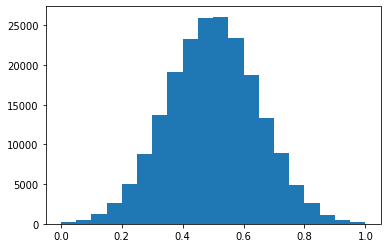

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

a = [p.skill_level for p in c.player_poule]
a.sort(reverse=True)
#print(a)

plt.hist(a, bins=20)

In [10]:
# NOTES

# Map to 900-1900-2900, but FIDE rules don't allow elo to be below certain point (I think it is 1000 or 1200)

# K is the development coefficient.
# K = 40 for a player new to the rating list until he has completed events with at least 30 games
# K = 20 as long as a player's rating remains under 2400.
# K = 10 once a player's published rating has reached 2400 and remains at that level subsequently, even if the rating drops below 2400.
# K = 40 for all players until their 18th birthday, as long as their rating remains under 2300.
